**Maximum Likelyhood Estimation (MLE)** 

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fbourgey/fre-gy-7773-mlfe/blob/main/02_mle.ipynb)

MLE is a statistical method used to estimate the parameters of a probability 
distribution by maximizing a likelihood function, so that under the assumed 
statistical model the observed data is most probable.

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import stats
import seaborn as sns

sns.set_theme("talk")
sns.set_style("whitegrid")
mpl.rcParams["figure.figsize"] = (8, 6)

## Coin tosses

Assume that, when tossing a coin, we observe the following outcomes:

- <span style="color:blue">success</span> = heads with probability $p = \mathbb{P}(X=1)$
- <span style="color:red">failure</span> = tails with probability $1-p = \mathbb{P}(X=0)$

where $X$ is a Bernoulli random variable with parameter $p$.

In [2]:
rng = np.random.default_rng(seed=42)
p = 0.8  # Probability of heads
n_tosses = 10**3
tosses = rng.choice([0, 1], size=n_tosses, p=[1 - p, p])
print(tosses[:10])  # First 10 tosses

[1 1 1 1 0 1 1 1 0 1]


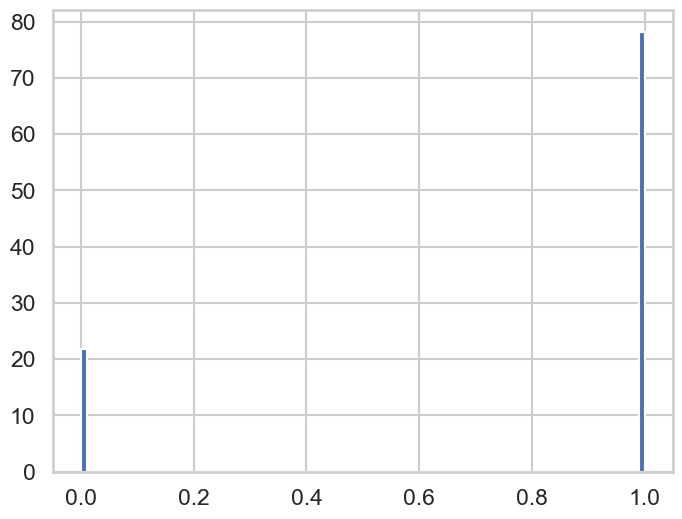

In [7]:
fig, ax = plt.subplots()
ax.hist(tosses, bins=100, density=True)
plt.show()

In [4]:
# MLE of p
mean_tosses = tosses.mean()
print(f"MLE of p: {mean_tosses}")

MLE of p: 0.782


## Random Walk

In [8]:
np.random.seed(42)
n_simulations = 1000
n_steps = 500
s0 = 100  # Initial stock price

stock = np.zeros((n_steps, n_simulations))
stock[0, :] = s0

for i in range(n_steps - 1):
    # Simulate random walk
    step = np.random.choice([-1, 1], p=[0.5, 0.5], size=n_simulations)
    stock[i + 1, :] = stock[i, :] + step

In [9]:
stock.shape

(500, 1000)

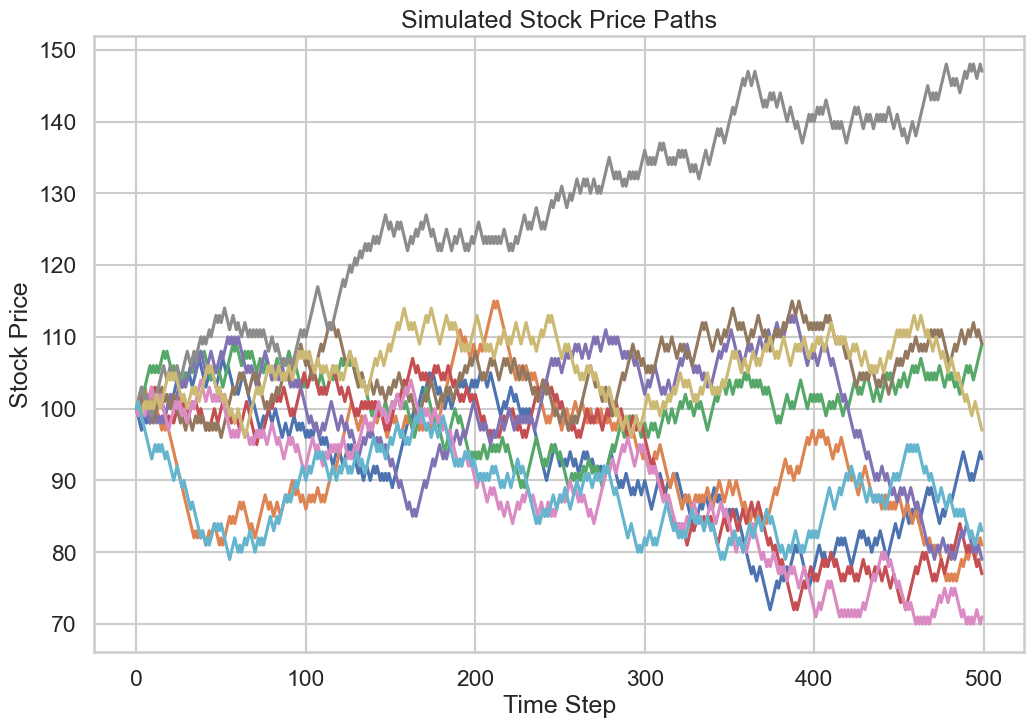

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
# TODO: Reproduce plot
ax.plot(stock[:, :10])  # Plot first 10 simulations
ax.set_xlabel('Time Step')
ax.set_ylabel('Stock Price')
ax.set_title('Simulated Stock Price Paths')
plt.show()

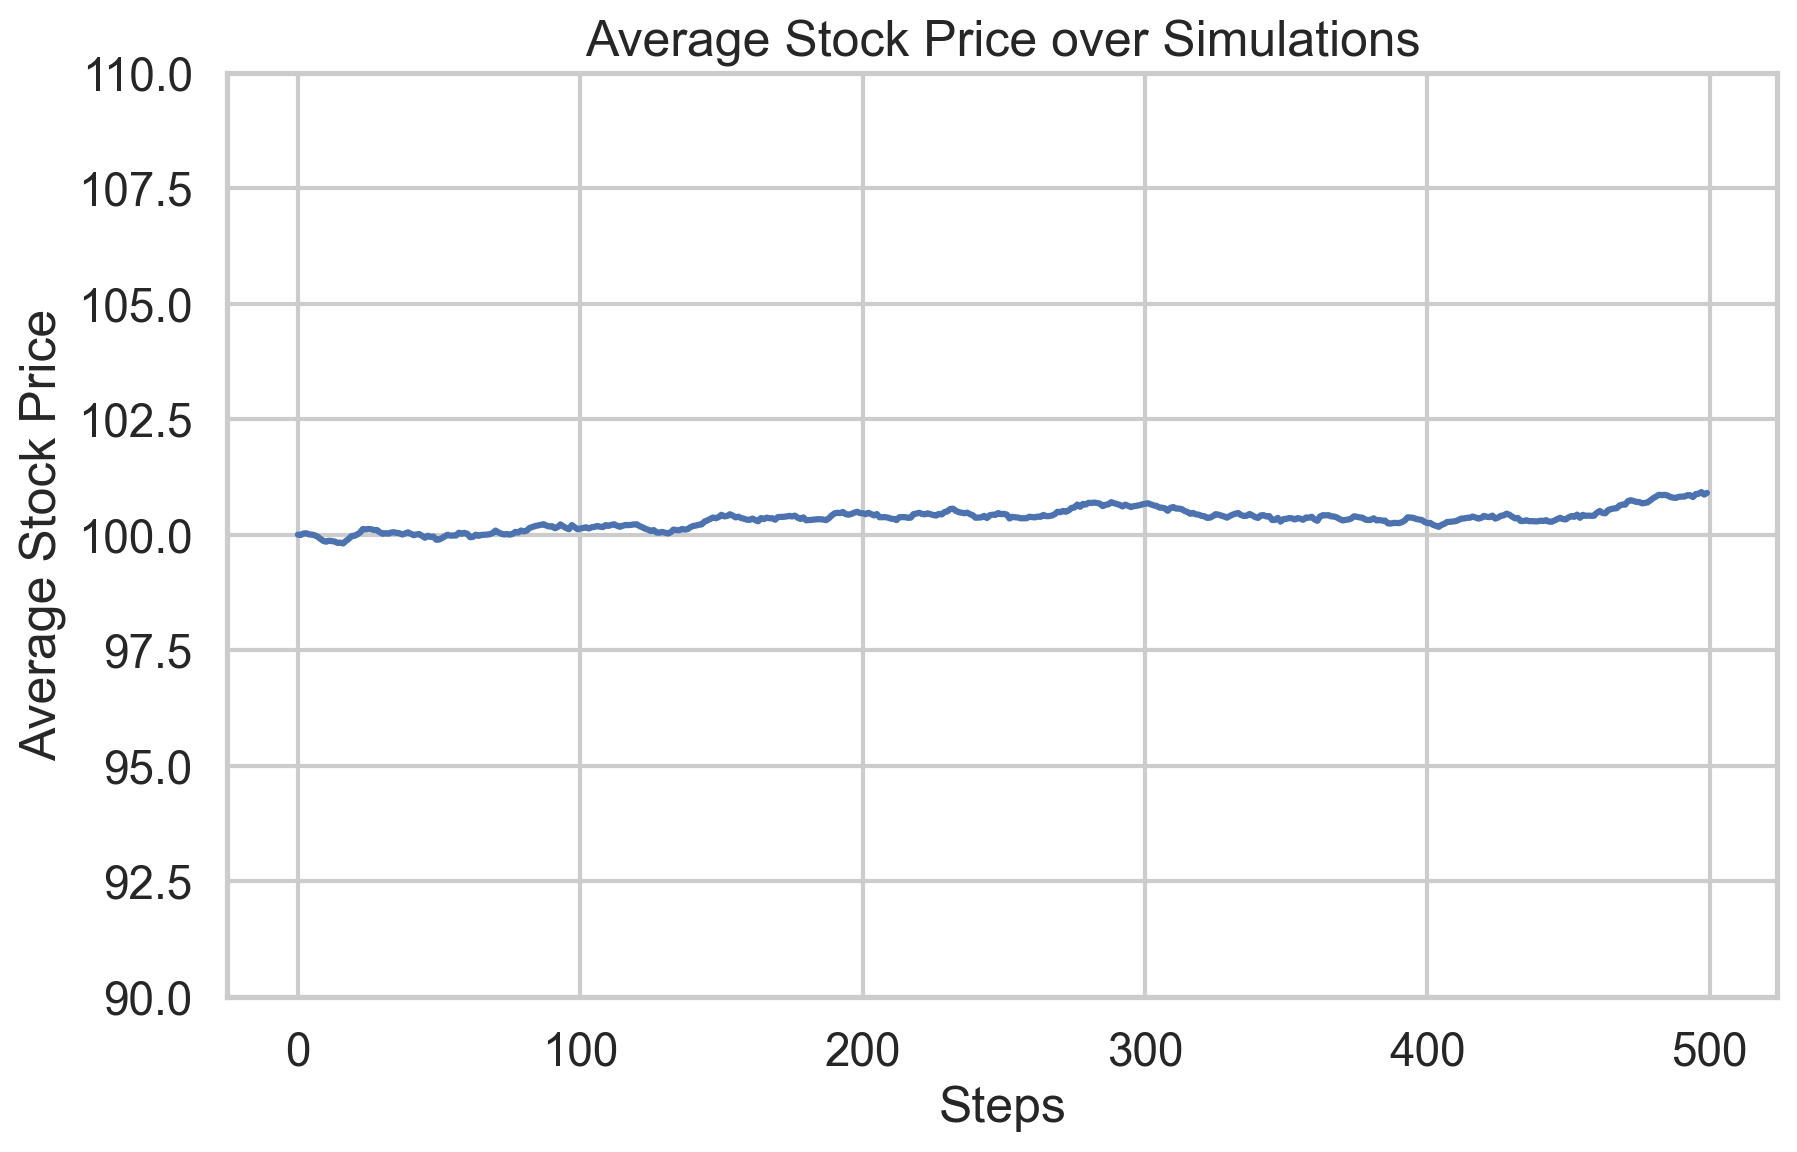

In [9]:
# Plot the average stock price over all simulations
# as the number of simulations increases, we expect the average to converge to the
# initial price
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(stock.mean(axis=1))
ax.set_xlabel("Steps")
ax.set_ylabel("Average Stock Price")
ax.set_title("Average Stock Price over Simulations")
ax.set_ylim([s0 - 10, s0 + 10])
plt.show()

## Normal Distribution

In [10]:
rng = np.random.default_rng(seed=42)
# TODO: Generate samples from a normal distribution with 1000 samples, mean 1.0,
# stddev 0.8

n_samples = 1000
loc = 1.0
scale = 0.8
x_samples = rng.normal(loc=1.0, scale=0.8, size=1000)

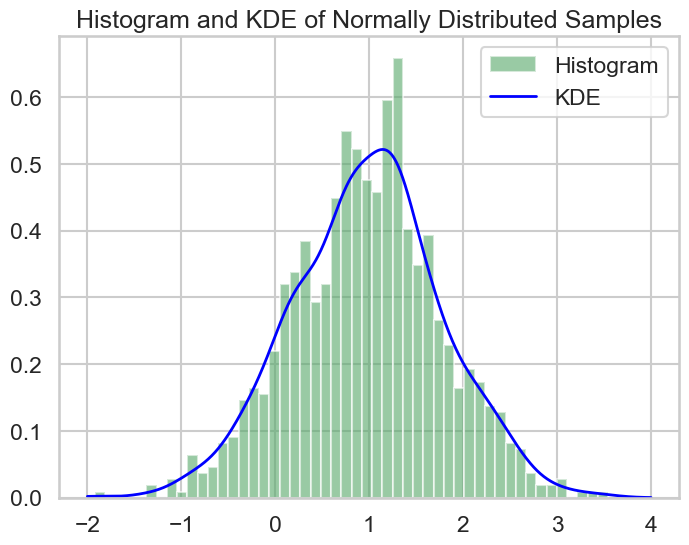

In [11]:
fig, ax = plt.subplots()
ax.hist(x_samples, bins=50, density=True, alpha=0.6, color="g", label="Histogram")
kde = stats.gaussian_kde(x_samples)
x = np.linspace(-2, 4, 1000)
ax.plot(x, kde(x), color="blue", lw=2, label="KDE")
ax.set_title("Histogram and KDE of Normally Distributed Samples")
ax.legend()
plt.show()

In [ ]:
mean_mle = x_samples.mean()
var_mle = x_samples.var(ddof=0)  # MLE uses population variance (ddof=0)

print(f"MLE Mean: {mean_mle}, MLE Variance: {var_mle}")

print(f"True Mean: {loc}, True Variance: {scale**2}")

print(f"Mean Error: {mean_mle - loc}, Variance Error: {var_mle - scale**2}")

MLE Mean: 0.9768867592032425, MLE Variance: 0.625646013478924
True Mean: 1.0, True Variance: 0.6400000000000001
Mean Error: -0.023113240796757473, Variance Error: -0.014353986521076112


## Multivariate Normal Distribution

In [ ]:
rng = np.random.default_rng(seed=42)

n_samples = 400
mean = np.array([-1.0, 1.0])
cov = np.array(
    [
        [1.0, -0.9],
        [-0.9, 1.0],
    ]
)
x_samples = rng.multivariate_normal(mean, cov, size=n_samples)

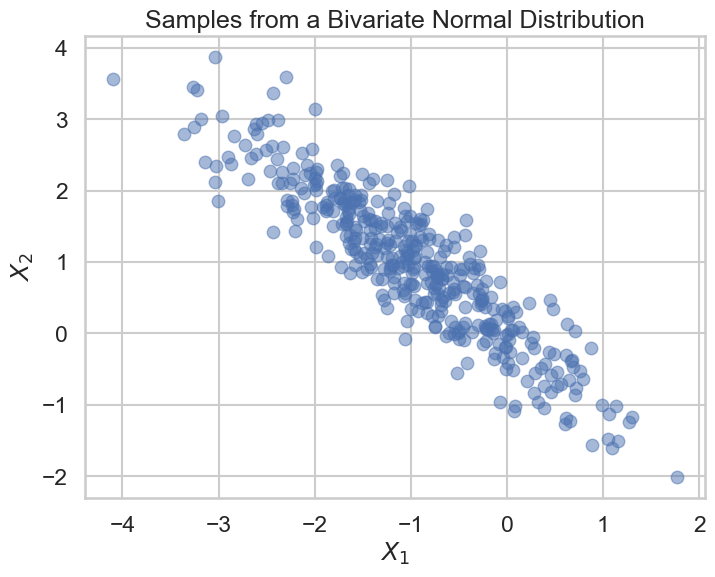

In [15]:
fig, ax = plt.subplots()
ax.plot(x_samples[:, 0], x_samples[:, 1], "o", alpha=0.5)
ax.set_xlabel("$X_1$")
ax.set_ylabel("$X_2$")
ax.set_title("Samples from a Bivariate Normal Distribution")
plt.show()

In [16]:
mean_mle = x_samples.mean(axis=0)
print(f"MLE of the mean: {mean_mle}")

MLE of the mean: [-0.98862415  0.97191162]


In [17]:
error_mean = mean_mle - mean
print(f"Error in MLE of the mean: {error_mean}")

Error in MLE of the mean: [ 0.01137585 -0.02808838]


In [18]:
cov_mle_1 = (x_samples - mean_mle).T @ (x_samples - mean_mle) / (n_samples - 1)
print(cov_mle_1)

cov_mle_2 = np.cov(x_samples, rowvar=False, ddof=1)
print(cov_mle_2)

[[ 0.9379819  -0.91215979]
 [-0.91215979  1.07251425]]
[[ 0.9379819  -0.91215979]
 [-0.91215979  1.07251425]]


In [19]:
error_cov = np.abs(cov_mle_1 - cov)
print(f"Error in MLE of the covariance matrix:\n{error_cov}")

Error in MLE of the covariance matrix:
[[0.0620181  0.01215979]
 [0.01215979 0.07251425]]
